# Ankit Aharwal
Enroll no: 18114006

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
sns.set()

In [2]:
data=pd.read_csv("Boston.csv",index_col=0)
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


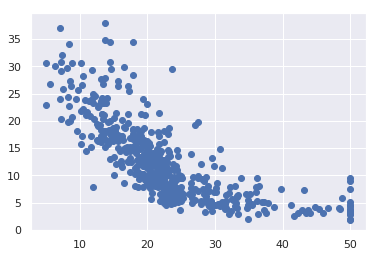

In [3]:
plt.scatter(data=data,x="medv",y="lstat")

In [4]:
lr=sm.OLS.from_formula("medv~lstat",data)
results=lr.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Wed, 27 Feb 2019   Prob (F-statistic):           5.08e-88
Time:                        21:19:44   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
print(results.rsquared,results.rsquared_adj,results.f_pvalue,results.params.lstat)

0.5441462975864797 0.5432418259547068 5.081103394388134e-88 -0.9500493537579906


In [6]:
d={"lstat":[5,10,15]}
new_data=pd.DataFrame(d)
new_data["Intercept"]=1
new_data.head()

,lstat,Intercept
0,5,1
1,10,1
2,15,1


In [7]:
def predict_confi(results,data,p=0.95):
    a=1-p
    temp_data=data.copy()
    conf=results.conf_int(alpha=a).sort_index(axis=0)
    data=data.sort_index(axis=1)
    temp=data.dot(conf)
    data["[ lower"]=temp[0]
    data["middle"]=results.predict(temp_data)
    data["upper ]"]=temp[1]
    return data

In [8]:
predict_confi(results,new_data,0.95)

,Intercept,lstat,[ lower,middle,upper ]
0,1,5,28.317716,29.803594,31.289472
1,1,10,23.186975,25.053347,26.919720
2,1,15,18.056234,20.303101,22.549967


/home/ankit/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


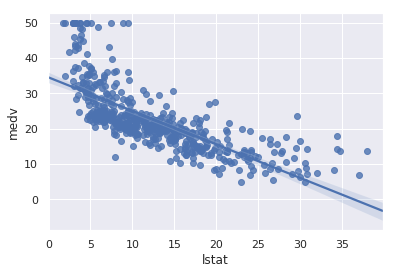

In [9]:
sns.regplot(data["lstat"], data["medv"], fit_reg=True)

Text(0,0.5,'residue')

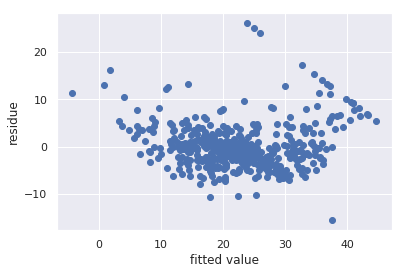

In [39]:
plt.scatter(results.fittedvalues,results.resid)
plt.xlabel("fitted value")
plt.ylabel("residue")

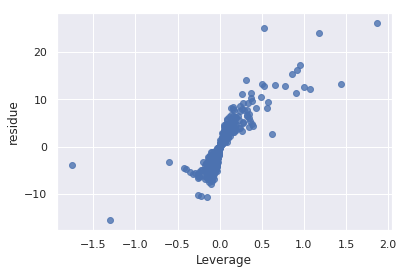

In [40]:
from statsmodels.stats.outliers_influence import OLSInfluence
leverage = pd.Series(OLSInfluence(results).influence, name = "Leverage")
s_residuals=pd.Series(results.resid,name="residue")
sns.regplot(leverage, s_residuals,  fit_reg=False)

In [42]:
features=list(data.columns)
features.remove("medv")
s="medv~"+"+".join(features)+"+"
lr=sm.OLS.from_formula(s[:-1],data)
results=lr.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Wed, 27 Feb 2019   Prob (F-statistic):          6.72e-135
Time:                        21:47:03   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
lr1=sm.OLS.from_formula("medv~lstat",data).fit()
lr2=sm.OLS.from_formula("medv~np.log(lstat)+lstat",data).fit()
sm.stats.anova_lm(lr1,lr2)

/home/ankit/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/ankit/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/ankit/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1821: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,504.0,19472.381418,0.0,NaN,NaN,NaN
1,503.0,13906.713553,1.0,5565.667865,201.307874,1.129371e-38


In [36]:
features=list(data.columns)
features.remove("medv")
s="medv~"+"*".join(features)+"*"
lr=sm.OLS.from_formula(s[:-1],data)
results=lr.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.293e+10
Date:                Wed, 27 Feb 2019   Prob (F-statistic):           2.11e-30
Time:                        21:27:32   Log-Likelihood:                 5168.8
No. Observations:                 506   AIC:                            -9338.
Df Residuals:                       6   BIC:                            -7224.
Df Model:                         499                                         
Covariance Type:            nonrobust                                         
=================================================================================================================================
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------
Intercept                                                       -7.4e-07   9.36e-10   -790.905      0.000   -7.42e-07   -7.38e-07
crim                                                            6.14e-06   8.67e-09    708.085      0.000    6.12e-06    6.16e-06
zn                                                             5.805e-06   7.95e-10   7303.041      0.000     5.8e-06    5.81e-06
crim:zn                                                        3.044e-06   4.58e-09    665.420      0.000    3.03e-06    3.06e-06
indus                                                          3.786e-05   1.15e-08   3289.700      0.000    3.78e-05    3.79e-05
crim:indus                                                    -2.469e-05   2.03e-08  -1218.395      0.000   -2.47e-05   -2.46e-05
zn:indus                                                       3.021e-07   6.43e-10    469.710      0.000    3.01e-07    3.04e-07
crim:zn:indus                                                  6.213e-07    1.4e-10   4432.839      0.000    6.21e-07    6.22e-07
chas                                                           1.452e-06   2.91e-10   4983.166      0.000    1.45e-06    1.45e-06
crim:chas                                                      9.259e-07   7.27e-11   1.27e+04      0.000    9.26e-07    9.26e-07
zn:chas                                                       -1.878e-06   1.83e-10  -1.03e+04      0.000   -1.88e-06   -1.88e-06
crim:zn:chas                                                  -7.961e-08   5.06e-10   -157.291      0.000   -8.08e-08   -7.84e-08
indus:chas                                                     4.583e-07   1.79e-09    255.539      0.000    4.54e-07    4.63e-07
crim:indus:chas                                                2.471e-06   7.64e-09    323.507      0.000    2.45e-06    2.49e-06
zn:indus:chas                                                 -4.614e-05   7.79e-09  -5921.391      0.000   -4.62e-05   -4.61e-05
crim:zn:indus:chas                                            -2.991e-05   1.36e-09   -2.2e+04      0.000   -2.99e-05   -2.99e-05
nox                                                            1.917e-08   3.93e-09      4.882      0.003    9.56e-09    2.88e-08
crim:nox                                                      -1.908e-05   1.23e-09  -1.55e+04      0.000   -1.91e-05   -1.91e-05
zn:nox                                                         5.542e-05   1.69e-08   3274.785      0.000    5.54e-05    5.55e-05
crim:zn:nox                                                    2.934e-06   7.35e-10   3989.842      0.000    2.93e-06    2.94e-06
indus:nox                                                      5.149e-06   4.56e-09   1128.51

In [51]:
sm.OLS.from_formula('medv ~ ' + '+'.join(['np.power(lstat,' + str(i) + ')' for i in range(1,4)]), data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.658
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     321.7
Date:                Wed, 27 Feb 2019   Prob (F-statistic):          1.78e-116
Time:                        22:02:22   Log-Likelihood:                -1568.9
No. Observations:                 506   AIC:                             3146.
Df Residuals:                     502   BIC:                             3163.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             48.6496      1.435     33.909      0.000      45.831      51.468
np.power(lstat, 1)    -3.8656      0.329    -11.757      0.000      -4.512      -3.220
np.power(lstat, 2)     0.1487      0.021      6.983      0.000       0.107       0.191
np.power(lstat, 3)    -0.0020      0.000     -5.013      0.000      -0.003      -0.001
==============================================================================
Omnibus:                      107.925   Durbin-Watson:                   0.906
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              258.171
Skew:                           1.088   Prob(JB):                     8.69e-57
Kurtosis:                       5.741   Cond. No.                     5.20e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.2e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [57]:
data=pd.read_csv("Carseats.csv",index_col=0)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
1,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
2,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
3,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
4,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
5,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [59]:
data.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [62]:
lr=sm.OLS.from_formula("Sales~"+"+".join(data.columns.difference(["Sales"])),data)
lr.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     243.4
Date:                Wed, 27 Feb 2019   Prob (F-statistic):          1.60e-166
Time:                        22:12:25   Log-Likelihood:                -568.99
No. Observations:                 400   AIC:                             1162.
Df Residuals:                     388   BIC:                             1210.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               5.6606      0.603      9.380      0.000       4.474       6.847
ShelveLoc[T.Good]       4.8502      0.153     31.678      0.000       4.549       5.151
ShelveLoc[T.Medium]     1.9567      0.126     15.516      0.000       1.709       2.205
US[T.Yes]              -0.1841      0.150     -1.229      0.220      -0.479       0.111
Urban[T.Yes]            0.1229      0.113      1.088      0.277      -0.099       0.345
Advertising             0.1231      0.011     11.066      0.000       0.101       0.145
Age                    -0.0460      0.003    -14.472      0.000      -0.052      -0.040
CompPrice               0.0928      0.004     22.378      0.000       0.085       0.101
Education              -0.0211      0.020     -1.070      0.285      -0.060       0.018
Income                  0.0158      0.002      8.565      0.000       0.012       0.019
Population              0.0002      0.000      0.561      0.575      -0.001       0.001
Price                  -0.0954      0.003    -35.700      0.000      -0.101      -0.090
==============================================================================
Omnibus:                        0.811   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.667   Jarque-Bera (JB):                0.765
Skew:                           0.107   Prob(JB):                        0.682
Kurtosis:                       2.994   Cond. No.                     4.15e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""